In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Visualize the data generated from AI

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/hayyaoe/statistics_AFL2/main/dataset.csv?token=GHSAT0AAAAAACP3TA5GU6QPMZLDGJ6AZWMOZRAX2RQ', delimiter = ',')
df['engine_position'] = df['engine_position'].str.strip()
df['drivetrain'] = df['drivetrain'].str.strip()
df

,model,brand,drivetrain,engine_position,handling,acceleration,braking,horsepower,top_speed,weight,year_of_production
0,911 GT3 RS,Porsche,RWD,Rear,8.5,8.7,9.0,520,310,1350,2022.0
1,M3,BMW,RWD,Front,8.2,7.8,8.5,480,300,1600,2023.0
2,911 Turbo S,Porsche,AWD,Rear,8.7,9.0,9.2,640,330,1600,2022.0
3,DB11,Aston Martin,RWD,Front,8.0,8.5,8.0,600,320,1800,2021.0
4,Civic Type R,Honda,FWD,Front,8.0,6.5,7.0,320,270,1400,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
113,Astra VXR,Opel,FWD,Front,7.0,7.5,7.0,276,250,1500,2007.0
114,Gran Turismo,BMW,RWD,Front,8.0,8.5,8.5,600,330,1700,2022.0
115,Sierra 1500 AT4,GMC,4WD,Front,6.5,7.0,6.5,355,220,2300,2022.0
116,AMG GT R,Mercedes-Benz,RWD,Front,8.0,8.0,8.5,577,318,1570,2017.0


In [8]:
# df['drivetrain'].unique()

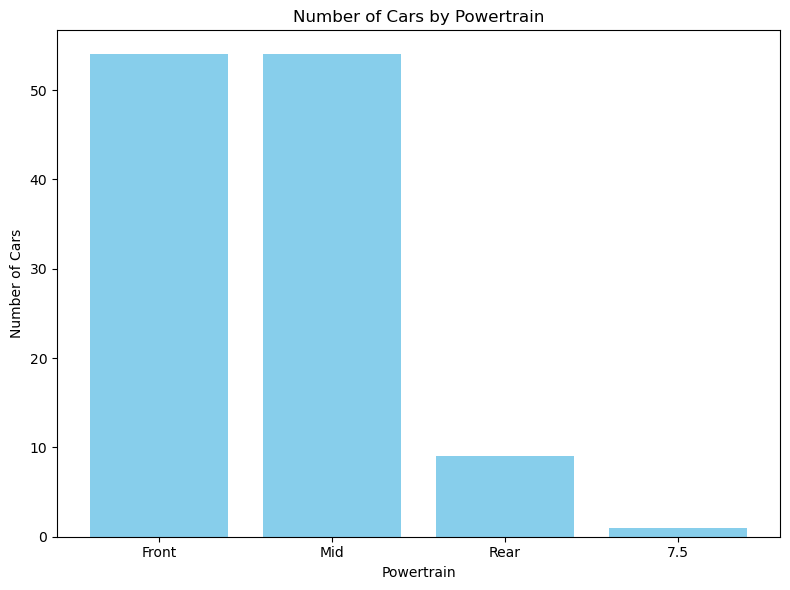

In [14]:
# Count the number of cars for each powertrain
powertrain_counts = df['engine_position'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(powertrain_counts.index, powertrain_counts.values, color='skyblue')
plt.xlabel('Powertrain')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Powertrain')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


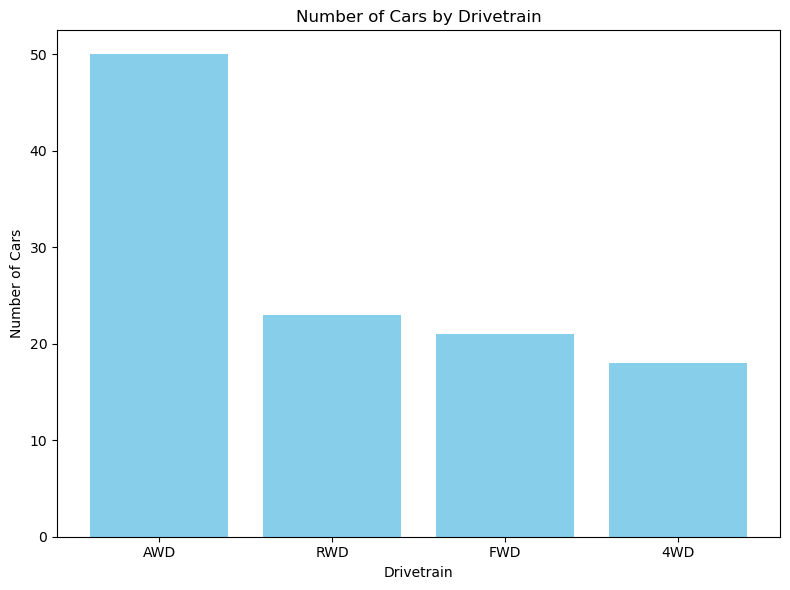

In [10]:
# Count the number of cars for each drivetrain
drivetrain_counts = df['drivetrain'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(drivetrain_counts.index, drivetrain_counts.values, color='skyblue')
plt.xlabel('Drivetrain')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Drivetrain')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()